# Grab the latest exoplanet database from CalTech.

20180406 weg Copied over the ExopDBase notebook for making histograms.
Should allow histograms of current or saved dbase.  Should allow plots of the set of exops we use for the calculation and the set of all exops where that entry exists.

In [1]:
import sys, os
import numpy as np
import urllib as ul
import gwTools as gwt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  Save and filter down to the needed parameters for GW calculations with binary masses.

In [2]:
# The Directory to save the csv file.
thisDir = os.getcwd()
csvDir = thisDir + '/../dbases/'

In [3]:
# The search URL and search string/request. 
exopURL = \
  "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-\
nstedAPI?" ;

#searchString = \
#"table=exoplanets&select=pl_hostname,ra,dec&order=dec&format=CSV";*)

# The Below does NOT have right ascension and declination.  Will likely want them for further work.
# Can add later in its own Panda dataframe and/or merge into the main one in GWStrainPlotsSNR.
# variables come from NASA Exoplanet Archive, the keywords are defined here: 
#https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html 
searchString = \
  "table=exoplanets&select=pl_hostname,pl_letter,pl_discmethod,pl_\
orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_\
plx&order=dec&format=CSV";

In [4]:
# Set to True to re-read the EXop Dbase from Caltech.  False to use csvFname below.
#newImport = True;
newImport = False;

In [5]:
# csv file below was downloaded earlier with code below.  newImport = False to use it.  Or new csv will be
# created.  This takes a few seconds.
csvFname = csvDir + 'exopP_20180403_110820.csv'  
if newImport:
    myDateTimeStamp = gwt.dateTimeStamp()  # See the gwtools.py file with this and other functions in it.
    csvFname = csvDir + 'exopP_' + myDateTimeStamp + '.csv'
    ofile = open(csvFname, 'w')
    with ul.request.urlopen(exopURL + searchString) as response:
        for aline in response:
            ofile.write( aline.decode('utf-8') )  # byte-string needs to be decoded. utf-8 is common encoding
            #print( aline )
    ofile.close()

print('Saved database file ' + csvFname)

Saved database file /home/gabella/Documents/astro/exop/exoplanetsMath/python/../dbases/exopP_20180403_110820.csv


## Check the file contents and number of exops with required data (filtering/dropping).

In [6]:
# Checked that it worked by printing a couple of lines.
with open(csvFname, 'r') as ifile:
    print(ifile.readline(), '\n', ifile.readline() )  #Print a couple of lines 

    ifile.seek(0);  # and reset the pointer.

    dbData = pd.read_csv(ifile)  # Read the file into a Panda dataframe
    ifile.close()

pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
 
 HD 142022 A,b,Radial Velocity,1928.00000000,3.030000,0.530000,5.10000,35.87,0.99,2014-05-14,27.88



In [7]:
dbData.head(10)  # NaN's show up in the field with no data!  Want to drop these from the dataframe.

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
0,HD 142022 A,b,Radial Velocity,1928.000000,3.0300,0.5300,5.100,35.87,0.99,2014-05-14,27.88
1,HD 39091,b,Radial Velocity,2151.000000,3.3800,0.6405,10.270,18.21,1.10,2014-07-23,54.92
2,HD 137388 A,b,Radial Velocity,330.000000,0.8900,0.3600,0.223,38.45,0.86,2014-05-14,26.01
3,GJ 3021,b,Radial Velocity,133.710000,0.4900,0.5110,3.370,17.62,0.90,2014-05-14,56.76
4,HD 63454,b,Radial Velocity,2.818049,0.0368,0.0000,0.398,35.80,0.84,2015-03-26,27.93
5,HD 212301,b,Radial Velocity,2.245715,0.0360,0.0000,0.450,52.72,1.27,2014-05-14,18.97
6,CHXR 73,b,Imaging,NaN,210.0000,NaN,12.569,NaN,0.35,2014-05-14,NaN
7,CT Cha,b,Imaging,NaN,440.0000,NaN,17.000,165.00,NaN,2014-05-14,NaN
8,HD 196067,b,Radial Velocity,3638.000000,5.0200,0.6600,6.900,43.57,1.29,2014-05-14,22.95
9,HD 68402,b,Radial Velocity,1103.000000,2.1800,0.0300,3.070,78.00,1.12,2016-11-10,12.82


In [8]:
# Graphic from the Mathematica file for filtering, data from 20180201_092937.csv.
# print('Screenshot from the Mathematica file for filtering, data from 20180201_092937.csv.')
# print('For comparison with below .dropna() Pandas version.')
# from IPython.display import Image
# Image(filename = 'filteringMathematica.png')

In [9]:
print('Original number of exoplanets in csv file ', len(dbData) )

Original number of exoplanets in csv file  3708


## Use .dropna() in pandas to remove all the NaN's, i.e. the missing data rows/exops.

In [10]:
# {"pl_hostname", "pl_letter", "pl_discmethod", "pl_orbper", \
# "pl_orbsmax", "pl_orbeccen", "pl_bmassj", "st_dist", "st_mass", \
# "rowupdate", "st_plx"}
print('Rows of all data, dbData ', len(dbData) )
aData = dbData.dropna(axis = 0, how = 'any', subset = ['pl_orbeccen'])
print('Rows with pl_orbeccen\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_orbper'])
print('Rows with pl_orbper\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_orbsmax'])
print('Rows with pl_orbsmax\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_bmassj'])
print('Rows with pl_bmassj\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['st_dist'])
print('Rows with st_dist\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['st_mass'])
print('Rows with st_mass\t', len(aData) )

Rows of all data, dbData  3708
Rows with pl_orbeccen	 1172
Rows with pl_orbper	 1172
Rows with pl_orbsmax	 1107
Rows with pl_bmassj	 1027
Rows with st_dist	 920
Rows with st_mass	 910


## Some histograms

### A list of the columns to histogram

In [25]:
histCols = ['pl_orbeccen', 'pl_orbper', 'pl_orbsmax', 'pl_bmassj', 'st_dist', 'st_mass']
titles = ['Eccentricy', 'Orbital Period', 'SemiMajor Axis', 'Planet Mass', 'Stellar Distance', 'Stellar Mass']
xlabels = ['eccentricity', 'orbital period (d)', 'semi-major axis (au)', 'planet mass (M_J)', 
           'stellar distance (pc)', 'stellar mass (M_sol)']

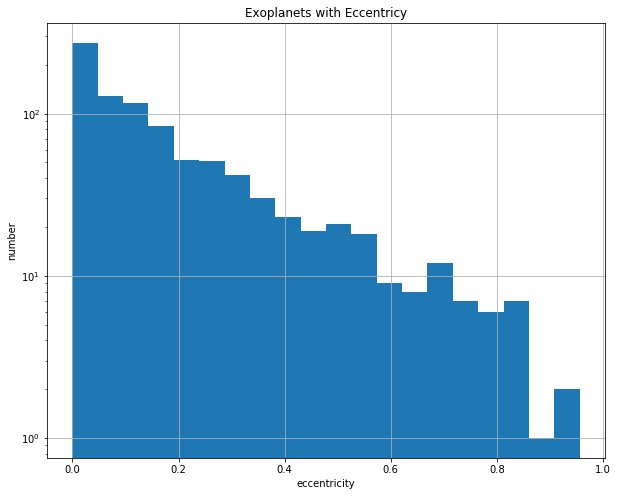

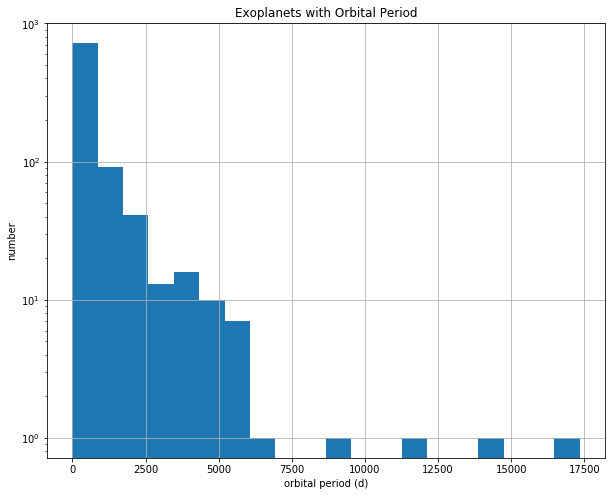

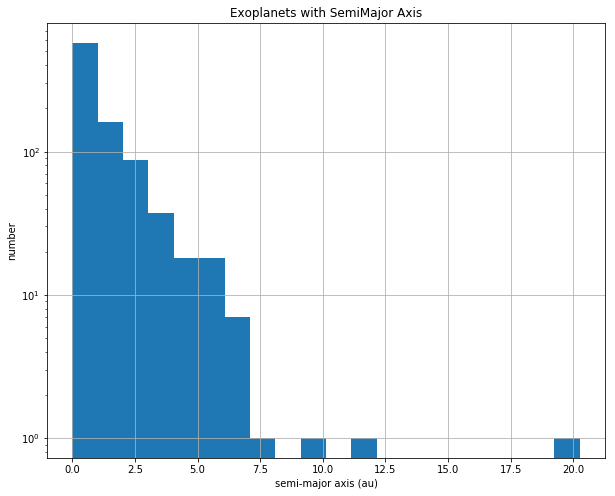

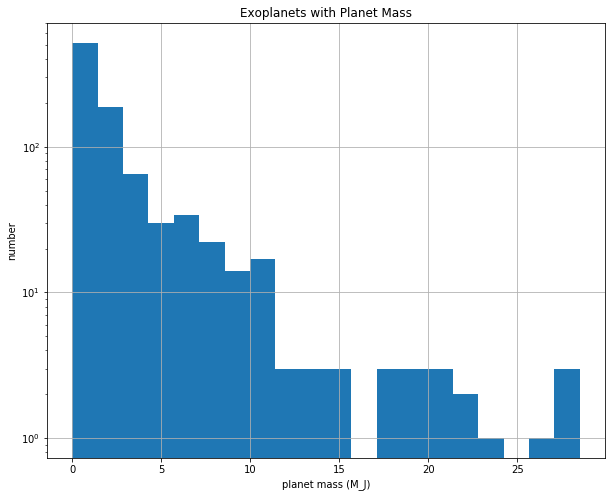

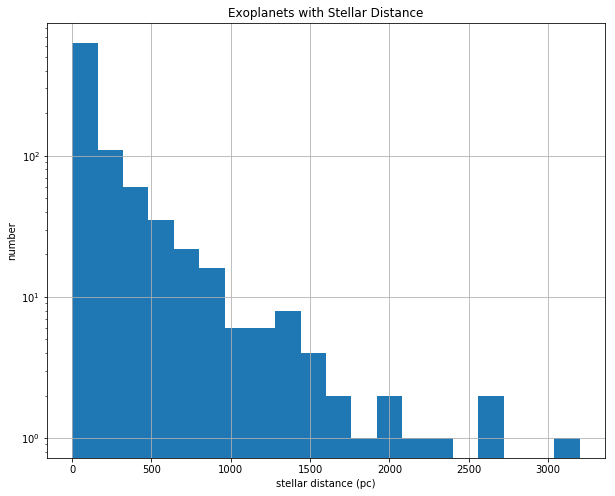

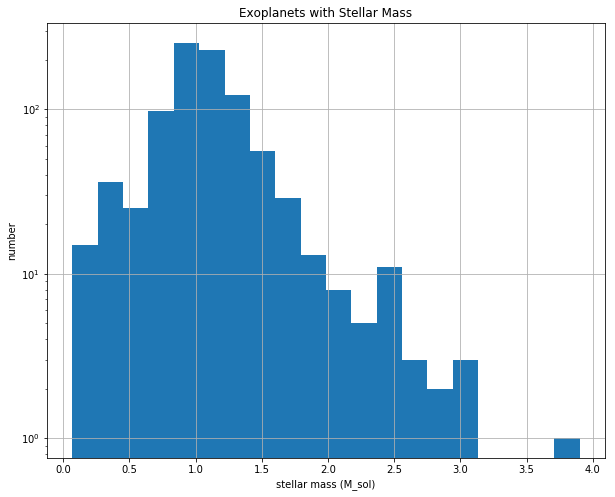

In [29]:
figs=[]
axs=[]
for icol, ititle, ixlabel in zip(histCols, titles, xlabels):
    # time to get fancy
    afig = plt.figure( figsize=(10,8) )
    figs.append( afig )
    ax = afig.add_subplot((111))
    axs.append( ax )
    aData.hist(icol, ax=ax, bins=20)
    ax.set_title('Exoplanets with ' + ititle)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('number')
    ax.set_xlabel(ixlabel)
    plt.show()

In [ ]:
# time to get fancy
afig = plt.figure( figsize=(10,8) )
ax = afig.add_subplot((111))
aData.hist('pl_orbeccen', ax=ax, bins=20)
ax.set_title('Exoplanets with Eccentricity')
ax.set_yscale('log')
ax.set_ylabel('number')
ax.set_xlabel('eccentricity')